<a href="https://colab.research.google.com/github/AnonymousStand/hello-world/blob/master/ComputationalLearningAndMemoryModel_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import torch
torch.__version__

'2.8.0+cu126'

In [68]:
# Install PyTorch if needed
#!pip install torch

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [69]:
class Autoencoder(nn.Module):
    def __init__(self, input_size, latent_size=8):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, latent_size),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [70]:
def encode_string(s, max_len, char_to_idx):
    one_hot = np.zeros((max_len, len(char_to_idx)))
    for i, c in enumerate(s.lower()[:max_len]):
        if c in char_to_idx:
            one_hot[i][char_to_idx[c]] = 1
    return one_hot.flatten()

def is_anomaly(model, input_str, max_len, char_to_idx, threshold=0.05):
    x = encode_string(input_str, max_len, char_to_idx)
    x = torch.FloatTensor(x).unsqueeze(0)
    with torch.no_grad():
        reconstruction = model(x)
        error = torch.mean((x - reconstruction) ** 2).item()
    return error > threshold, error


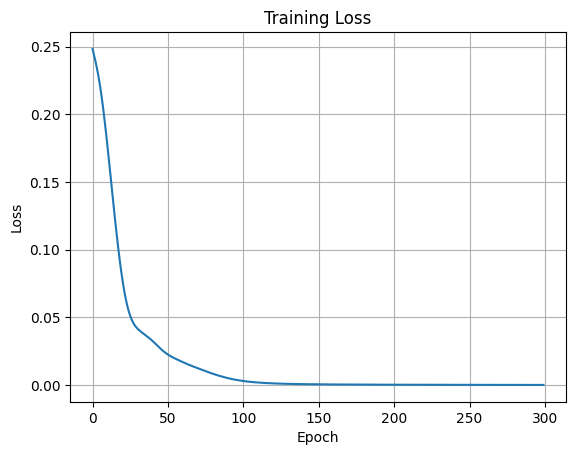

In [71]:
# Normal input commands (training data)
normal_inputs = ["apple", "cat", "tree", "sequoia", "lion", "turnip", "fungus"]

# Preprocessing
max_len = max(len(s) for s in normal_inputs)
vocab = sorted(set(''.join(normal_inputs)))
char_to_idx = {c: i for i, c in enumerate(vocab)}

X_train = np.array([encode_string(s, max_len, char_to_idx) for s in normal_inputs])
X_train = torch.FloatTensor(X_train)

# Model setup
model = Autoencoder(input_size=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
losses = []
for epoch in range(300):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, X_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot training loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()


In [72]:
test_inputs = [
    "fire",
    "patience",
    "sermon",
    "horse",
    "mother",
    "iron",
    "miner",
    "thorough",
    "tire",
    "panda"
]

for input_str in test_inputs:
    anomaly, err = is_anomaly(model, input_str, max_len, char_to_idx)
    status = "[!] Anomaly" if anomaly else "[✓] Normal"
    print(f"{input_str:10} {status} (error={err:.4f})")


fire       [✓] Normal (error=0.0382)
patience   [!] Anomaly (error=0.0532)
sermon     [✓] Normal (error=0.0370)
horse      [✓] Normal (error=0.0365)
mother     [✓] Normal (error=0.0346)
iron       [✓] Normal (error=0.0284)
miner      [✓] Normal (error=0.0363)
thorough   [!] Anomaly (error=0.0506)
tire       [✓] Normal (error=0.0253)
panda      [✓] Normal (error=0.0358)
